<a href="https://colab.research.google.com/github/mahera02/machine_learning/blob/master/HW2/Architecture_4_cifar10_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 data set

In [0]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os
import time
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# shuffling the images after loading
train_images, train_labels = shuffle(train_images, train_labels, random_state=0)


# Architecture 4

**Initialize Parameters**

In [0]:
batch_size = 128
num_classes = 10
epochs = 125
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'arch4_keras_cifar10_trained_model.h5'

**Definition for Training and Loss Plots**

In [0]:
def plot_model_history(history):
   acc = history.history['acc']
   val_acc = history.history['val_acc']
  
   loss = history.history['loss']
   val_loss = history.history['val_loss']

   epochs = range(1, len(acc) + 1)

   # training and validation accuracy
  
   plt.title("Model Accuracy")
   plt.xlabel('Epoch')
   plt.ylabel('Accuracy')
   plt.plot(epochs, acc,  label='training acc')
   plt.plot(epochs, val_acc, label='validation acc')
   plt.legend()

   plt.figure()

   # training and validation loss
  
   plt.title("Model Loss")
   plt.xlabel('Epoch')
   plt.ylabel('Loss')
   plt.plot(epochs, loss,label='training loss')
   plt.plot(epochs, val_loss,label='validation loss')
   plt.legend()

   plt.show()

**Model Definition**

In [0]:
def model(train_images,train_labels,test_images,test_labels):
 
  print('train_images shape:', train_images.shape)
  print(train_images.shape[0], 'train samples')
  print(test_images.shape[0], 'test samples')

  
  model = Sequential()
  
  # Layer 1
  model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train_images.shape[1:]))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  # Layer 2
  model.add(Conv2D(32, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  # Layer 3
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  # Layer 4
  model.add(Conv2D(64, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.3))
  
   # Layer 5
  model.add(Conv2D(128, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  
  # Layer 6
  model.add(Conv2D(128, (3, 3)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.4))
  
  # dense layers
  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  model.summary()
  
  # Augmenting training set images
  train_datagen = ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=False)
  train_datagen.fit(train_images)
  
  # initiate RMSprop optimizer
  opt = keras.optimizers.rmsprop(lr=0.0003, decay=1e-6)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  start = time.time()
                
  model_history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=batch_size),steps_per_epoch = train_images.shape[0]/batch_size, epochs = epochs, 
                verbose = 1,validation_data = (test_images, test_labels) )          
                
  end = time.time()
  
  # Score trained model.
  scores = model.evaluate(test_images, test_labels, batch_size=128, verbose=1)
  print('Test loss:', scores[0])
  print("Test accuracy: %.2f%%" % (scores[1]*100))
  
  # plot model history
  plot_model_history(model_history)
  print("Model took %0.2f seconds to train" % (end - start))
    
  
  # Save model and weights
  if not os.path.isdir(save_dir):
      os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)
  print('Saved trained model at %s ' % model_path)
  
  return model

**Data Pre-Processing and Splitting the train_images to validation set (80:20) **

(10000, 32, 32, 3)
40000
40000
10000
10000
train_images shape: (40000, 32, 32, 3)
40000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (No

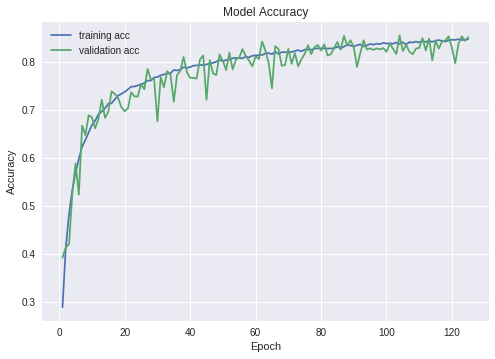

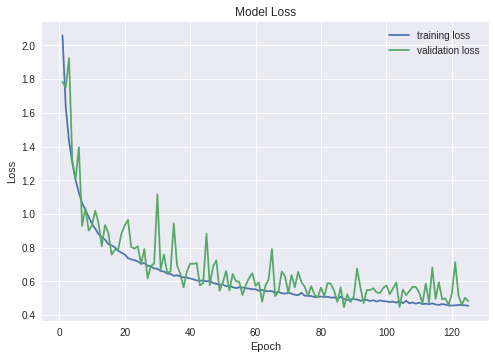

Model took 3533.71 seconds to train
Saved trained model at /content/saved_models/arch4_keras_cifar10_trained_model.h5 


In [0]:
#from sklearn.model_selection import train_test_split

#train_images, image_val, train_labels, label_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=1)

#len(image_val)

import numpy as np
X_folds = np.array_split(train_images, 5)
print(X_folds[4].shape)
y_folds = np.array_split(train_labels, 5)

# We use 'list' to copy, in order to 'pop' later on
X_train = list(X_folds)
X_val = X_train.pop(4)
X_train = np.concatenate(X_train)
y_train = list(y_folds)
y_val = y_train.pop(4)
y_train = np.concatenate(y_train)

print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))

# reshape train and test images 
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

#call model using X_train and y_train
model = model(X_train,y_train,X_val,y_val)
 

**Performance of the Architecture on the test set**

In [0]:
# reshape original test images 
test_images = test_images.astype('float32')
test_images /= 255

# Convert class vectors to binary class matrices.
test_labels = keras.utils.to_categorical(test_labels, num_classes)
 
scores = model.evaluate(test_images, test_labels,batch_size=128, verbose=1)
print('Test loss:', scores[0])
print("Test accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 104us/step
Test loss: 0.4956589337348938
Test accuracy: 84.27%


**Architecture Description**


In this architecture I have trained the dataset with simple hold out validation [ training set (80%) validation set (20%) ] for 125 epochs, batch size 128 and six convolutiton layers with Dropout and BatchNormalization and DataAugmentation. The learning rate is .0003 and. The performance evaluation of the model on validation set is 85.15%. The accuracy plot is also not overfitting.

This is the best architecture so far. Its performance on the original test data set is 84.27%